### Banknote Outliers Analysis and normalice with max-min
---

#### We have two variables V1 and V2 in the dataset. We will make a graph with a ellipse equal to 2 times the standard deviation to identify the outliers values ​​in red.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

##### *Let's see the dataset first*

In [2]:
file_to_read="Banknote.csv"
df_banknote=pd.read_csv(file_to_read)

#### Null values and duplicated

In [10]:
print("Values before: ", df_banknote.shape)
df_banknote= df_banknote.drop_duplicates()
print("Values after: ", df_banknote.shape)
#null values
missing_data = df_banknote.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


Values before:  (1348, 2)
Values after:  (1348, 2)
V1
False    1348
Name: V1, dtype: int64

V2
False    1348
Name: V2, dtype: int64



,V1,V2
count,1348.000000,1348.000000
mean,0.445785,1.909039
std,2.862906,5.868600
min,-7.042100,-13.773100
25%,-1.786650,-1.627000
50%,0.518735,2.334150
75%,2.853250,6.796025
max,6.824800,12.951600


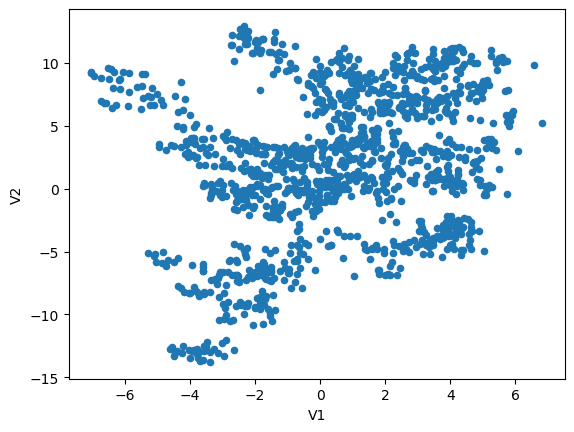

In [11]:
df_banknote.plot(kind="scatter", x="V1", y="V2")
df_banknote.describe()

In [12]:
print( "size: ", df_banknote.shape, "tipos de datos: ", df_banknote.dtypes)


size:  (1348, 2) tipos de datos:  V1    float64
V2    float64
dtype: object


#### Cast V1 and V2 to float

In [13]:
df_banknote[["V1", "V2"]]=df_banknote[["V1", "V2"]].astype("float")

#### Outliers V1 and V2

In [14]:


df_banknote.sort_values(by="V1", ascending=False, axis=0, inplace=True)
outliers_V1=df_banknote[df_banknote["V1"] > 5.68]
print("there are :", outliers_V1.shape, " outliers in V1 \n")

df_banknote.sort_values(by="V2", ascending=False, axis=0, inplace=True)
outliers_V2= df_banknote[df_banknote["V2"] > 11.73 ]
outliers_V2.shape
print("there are :", outliers_V2.shape, " outliers in V2 \n")




there are : (15, 2)  outliers in V1 

there are : (17, 2)  outliers in V2 



### Boxplot

<Axes: >

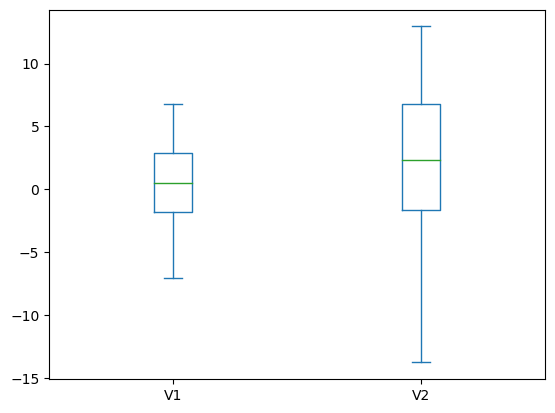

In [15]:
df_banknote.plot(kind="box")

###### Normalizing Dataset

In [ ]:
### Let's tried normalized dataset

<AxesSubplot:>

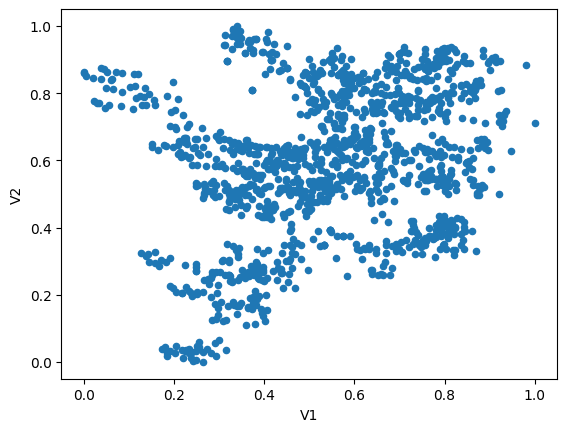

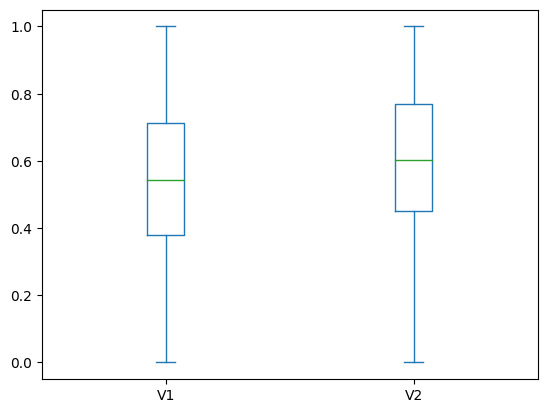

In [13]:
min_data=np.min(df_banknote,0)
max_data=np.max(df_banknote,0)
normed_data=(df_banknote- min_data)/ (max_data- min_data)
normed_data.plot(kind="scatter", x="V1", y="V2")
normed_data.plot(kind="box")

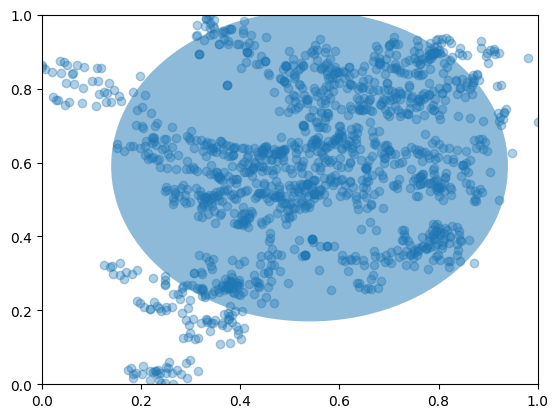

In [10]:
from matplotlib.patches import Ellipse

fig,ax=plt.subplots()

elipse=Ellipse( (0.54, 0.59),(0.8), (0.84), alpha=0.50)



ax.add_artist(elipse)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

ax.scatter(normed_data["V1"],normed_data["V2"], alpha=0.35)

plt.show()



In [7]:

normed_data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


#### Outliers Analysis

In [16]:
#from scipy import stats
#from scipy import ndimage

# create numpy array
values=np.array(df_banknote)
np_v1=values[:,0]
np_v2=values[:,1]

# standard deviation
std_v1=np_v1.std()
std_v2=np_v2.std()


np_v1_Outliers= np_v1[np_v1 >= (2 * std_v1)]
np_v2_Outliers= np_v2[np_v2 >= (2 * std_v2)]

print( "size for V1 without outliers: ", np_v1_Outliers.size, "size for V2 without outliers: " , np_v2_Outliers.size)

print ("\nOutliers for V2: ",  np_v2_Outliers, "\nOutliers for V1: ", np_v1_Outliers )






size for V1 without outliers:  13 size for V2 without outliers:  17

Outliers for V2:  [12.9516 12.7302 12.6247 12.606  12.5398 12.5026 12.3784 12.1984 12.1611
 12.1177 11.9625 11.9604 11.9459 11.9211 11.8818 11.8797 11.8052] 
Outliers for V1:  [5.7456 6.5633 5.7867 5.9374 5.8782 5.8862 5.7823 5.8519 5.7353 6.8248
 5.807  6.0919 5.7403]
